In [2]:
import pandas as pd
import numpy as np
import numpy.polynomial.polynomial as poly
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Neural Networks

## Neurons    
<img src="../images/neuron.png" align="left"/>  
Consist of:
- Cell Body
- Axon
- Synapes

Cell body recives signals via synapes from other nuerons, and is able upon crossing some threshold of the combination of signals, activates and fires its own signal along the axon an across the snapes. 

## Artificial Neural Network
We consider a simplified version of the network of neurons, allowing for combinations to fire under different stimuli, allowing for learning.  
If the sum if the inputs times their weights equals or exceeds the firing threshold $\theta$ then output 1, else 0.  
<img src="../images/ArtificialNeuronModel.png" width=450 align="left"/>
<img src="../images/perceptron.png" width=500 align="left"/>   

## Perceptron Unit

To model a nueron, we consider an input $X_i$ with corresponding weights $w_i$ (or gains), that is a component of a set of multiple inputs $i \in 1, 2, ... k$, all feeding a *unit*. We consider the collective *strength* of the inputs by summing all of the products of the inputs and their *weights*, also known as the *activation*, defined as:

 $$a = \sum_{i = 1}^k  x_i  w_i$$   
 The neuron fires if the activation exceeds a *firing threshold*, defined as $\Theta$. 

$$ 
y =  \begin{cases} 1 & \text{for  } a \gt \Theta  \\  0 &\text{for  } a \le \Theta \end{cases}
$$

This model is known as a *Perceptron*.     


**Perceptron is a linear function that computes hyperplanes.**   
<img src="../images/perceptron_plane.png" width=600 align="left"/>   

### Logical Operation   
The perceptron can perform logical operations based on weights and firing theshold.  
XOR is not linearly separable and needs two perceptrons to solve.  

<img src="../images/perceptron_and.png" width=475 align="left"/> 
<img src="../images/perceptron_or.png" width=475 align="right"/> 

<img src="../images/perceptron_not.png" width=475 align="left"/> 
<img src="../images/perceptron_xor.png" width=475 align="right"/> 

## Perceptron Training

### Perceptron Rule - single unit  

<img src="../images/perceptron_rule.png" width=475 align="left"/>   
Update is only applied if $x_i$ is mislabeled   
Only works if data is linearly separable   
Output is thesholded   

### Gradient descent
Need a learning algorithm that is robust to non-(linear separability).  Output is not thesholded.  

<img src="../images/perceptron_gradient_descent.png" width=475 align="left"/>   

For some *activation*:
$a = \sum_{i = 1}^k  x_i  w_i$

Define an error metric as:
$E(w) = \dfrac{1}{2} \sum_{(x, y) \in D} \left (y-a \right )^2$

To minimize take partial derivative of error metric with respect to each weight:
\begin{align} 
\frac{\partial E}{\partial w_i} & = \frac{\partial}{\partial w_i} \left ( \dfrac{1}{2} \sum_{(x, y) \in D} \left (y-a \right )^2 \right ) \\
& = \sum_{(x, y) \in D} (y-a) \frac{\partial}{\partial w_i}  \left ( - \sum_{i'} x_i w_{i'} \right ) \\
& = \sum_{(x, y) \in D} (y-a)  \left ( - x_i  \right )
\end{align}

### Comparison of Learning Rules

#### Perceptron Rule
- Takes activation, thresholding it (determines if output is 0 or 1)
- Guarantees finite convergence but only if linearly separable

$\Delta w_i = \eta \left ( y - \hat{y} \right ) x_i$

#### Gradient Descent 
- Move weights in negative direction of gradient
- Does not do thresholding  
- More robust to data sets that are not linearly separable but only converges to local minima / optima
- Can't do gradient descent on $\hat{y}$ because its non-differentiable (it's a step change)

$\Delta w_i = \eta \left ( y - a \right ) x_i$

### Sigmoid Function - Differentiable Threshold
Threshold using sigmoid function  

$ \sigma (a) = \frac{1}{1 + e^{-a}}$  

- as $ a \rightarrow -\infty$,   $ \sigma(a) \rightarrow 0$
- as $ a \rightarrow +\infty$,  $ \sigma(a) \rightarrow 1$

functionally, it works well due to being differentiable:

$ D( \sigma (a)) = \sigma (a) \left ( 1 - \sigma (a) \right ) $

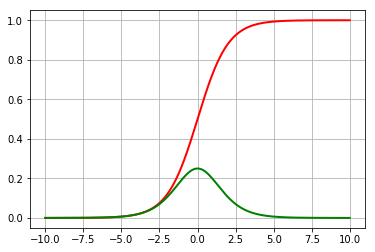

In [11]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def sigmoid_derivaitve(a):
    return sigmoid(a) * (1 - sigmoid(a))
    
x = np.arange(-10, 10, 0.01)
y = sigmoid(x)
z = sigmoid_derivaitve(x)
plt.plot(x,y, color='red', lw=2)
plt.plot(x,z, color='green', lw=2)
plt.grid()
plt.show()

## Neural Network

<img src="../images/neural_network.png" width=475 align="left"/>    
If using sigmoids the mapping from inputs to outputs is differentiable in terms of the weights   

Can figure out for any given weight in the network how moving it up or down a little with change mapping of inputs to outputs   **Backpropagation**     

Doesn't act exactly like perceptron - analogous to perceptron    

Don't have guarantee of convergance in finite time  

Not doing hard thresholding    

Error function can have many local optima and get stuck, not find global optima   

### Optimizing Weights

Many consider learning to be the same as optimization    
Other approaches  
- momentums 
- higher order derviatives (Newtonians)
- randomized optimization
- penalty for complexity
	- number of nodes
	- more layers
	- weight sizes (large values induce more complexity)

## Restriction Bias

What are neural networks appropriate for?   
The restriction bias tells us something about the representational power of the model by considering the set of hypothesis that we will consider.

Neural Networks consist of:

- Perceptron: half-spaces (planes)
- Sigmoids (instead of step functions): much more complex
- Hidden Layers (groups of sigmoid functions)

All of these components within a neural network allow for modeling many types of functions / behaviors, such as:

- Boolean: network of threshold-like units
- Continuous: 'connected' - no jumps - can do with single hidden layer as long as there is enough hidden units - each hidden unit handles on part of the function (use of sigmoids instead of step)
- Arbitrary (non-continuous): (stitched together) multiple hidden layers 

**Conclusion**:  Neural networks have low restriction bias, because they can model many different functions. Therefore they have the danger of overfitting

**Interestingly** in cross-validation efforts, one can oberserve the same characteristic plot of testing vs. training on each *iteration* of nueral network, however, *this isn't changing the network structure (e.g. model / hypothesis as referred to in other ML algorithms)*. Instead it's simply a convergence on the weights of the input features.

**Conclusion**:  Neural Networks have practically no restriction bias, and as such have a *danger of overfitting*.   

essentially not much restriction   
can model most anything by increasing network complexity (more layers, nodes) - BUT danger of overfitting   
complexity of NN is also in weights (nodes, layers, weights)   
use cross validation to stop know when error bottoms out to stop training   

## Preference Bias

A bias in the learning algorithms selection of one representation over another, such as one decision tree over another:

- preference for nodes near the top had higher information gain.
- preference of correct trees
- preference of shorter trees

In Nueral Networks:

- Initial weights should be chosen to be small and random values:
	- local minima 
	- provides variability and low complexity (larger weights equate to larger complexity).

Given that we choose an algorithm with small random weights and ending on some overfitting criteria, then we can say that neural networks prefer *simpler explanations*.   
Don't make it more complex unless error is getting better.  